In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('VGS_clean.csv')

In [3]:
df['year'] = df['year'].apply(lambda s:str(s)[:-2])
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['year'], format="%Y")).year
df.set_index('year', inplace=True)
df.sort_values(by='year', inplace=True)

In [4]:
y = df['global_sales']

In [5]:
y = pd.pivot_table(df ,index = "year" ,
                                       values = "global_sales",
                                       aggfunc = np.sum)

<AxesSubplot:xlabel='year'>

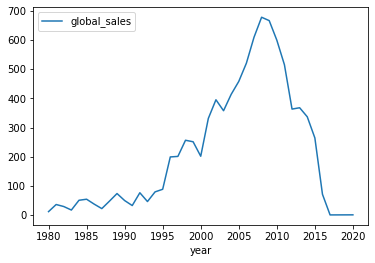

In [6]:
y.plot()

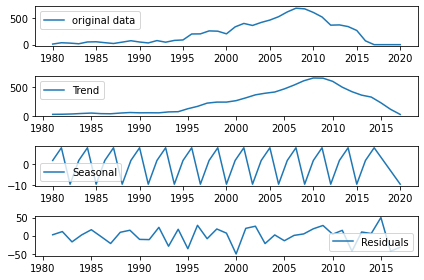

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, freq=3)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'original data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [8]:
from statsmodels.tsa.stattools import kpss
kpss(y)

C:\Users\DavidLara-Arango\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.2843899772458229,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

<AxesSubplot:xlabel='year'>

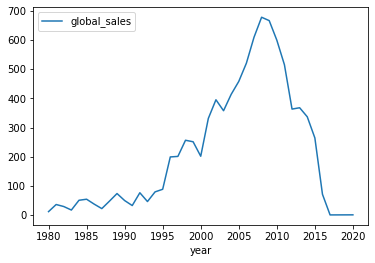

In [9]:
y.plot()

<AxesSubplot:xlabel='year'>

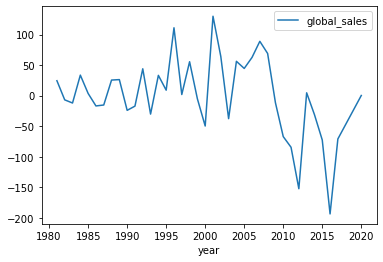

In [10]:
y_diff=y.diff().dropna()
y_diff.plot()

In [11]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [12]:
def evaluate_arima_model(df, arima_order):
    split=int(len(df) * 0.8) 
    train, test = df[0:split], df[split:len(df)]
    past=[x for x in train]
    predictions = list()
    for i in range(len(test)): 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    error = mean_squared_error(test, predictions)
    return error

In [13]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [14]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [15]:
evaluate_models(y.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=33881.445
ARIMA(0, 0, 1) MSE=11434.498
ARIMA(0, 1, 0) MSE=11671.704
ARIMA(0, 1, 1) MSE=9651.438
ARIMA(0, 1, 2) MSE=10128.102
ARIMA(0, 2, 0) MSE=8699.355
ARIMA(0, 2, 1) MSE=11417.975
ARIMA(0, 2, 2) MSE=13212.951


C:\Users\DavidLara-Arango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(1, 0, 0) MSE=9434.924
ARIMA(1, 0, 1) MSE=7305.643


C:\Users\DavidLara-Arango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(1, 0, 2) MSE=7327.703
ARIMA(1, 1, 0) MSE=9550.337
ARIMA(1, 1, 1) MSE=9781.442
ARIMA(1, 2, 0) MSE=8924.877
ARIMA(1, 2, 1) MSE=11292.628
ARIMA(2, 0, 0) MSE=7065.685


C:\Users\DavidLara-Arango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 1, 0) MSE=10239.821
ARIMA(2, 1, 1) MSE=9820.394


C:\Users\DavidLara-Arango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 2, 0) MSE=8806.356
ARIMA(2, 2, 1) MSE=13297.726
Best ARIMA(2, 0, 0) MSE=7065.685


C:\Users\DavidLara-Arango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [16]:
p=2
d=0
q=0
model = ARIMA(y, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(5)

C:\Users\DavidLara-Arango\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           global_sales   No. Observations:                   39
Model:                     ARMA(2, 0)   Log Likelihood                -214.352
Method:                       css-mle   S.D. of innovations             56.920
Date:                Fri, 30 Jul 2021   AIC                            436.703
Time:                        08:38:15   BIC                            443.358
Sample:                             0   HQIC                           439.091
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                157.4475    125.127      1.258      0.208     -87.797     402.692
ar.L1.global_sales     1.3409      0.142      9.446      0.000       1.063       1.619
ar.L2.global_sales    -0.4048      0.144     -2.811      0.005      -0.687      -0.123
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1340           +0.0000j            1.1340            0.0000
AR.2            2.1784           +0.0000j            2.1784            0.0000
-----------------------------------------------------------------------------
"""

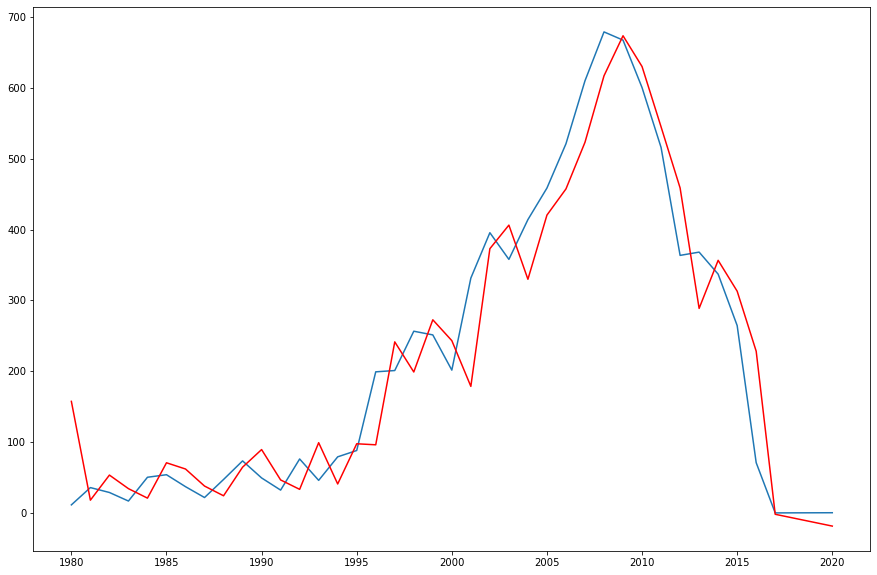

In [18]:
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(model_fit.predict(), color = 'red')

In [19]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period= 5
date_range = pd.date_range(str(y.index[-1]), periods = forecast_period, 
              freq='Y').strftime("%Y").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_years = pd.DataFrame(date_range, columns = ['year'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_years['year'] = pd.to_datetime(future_years['year']).dt.year
future_years.set_index('year', inplace = True)

future_years['Prediction'] = pd.Series(forecast[0]).values

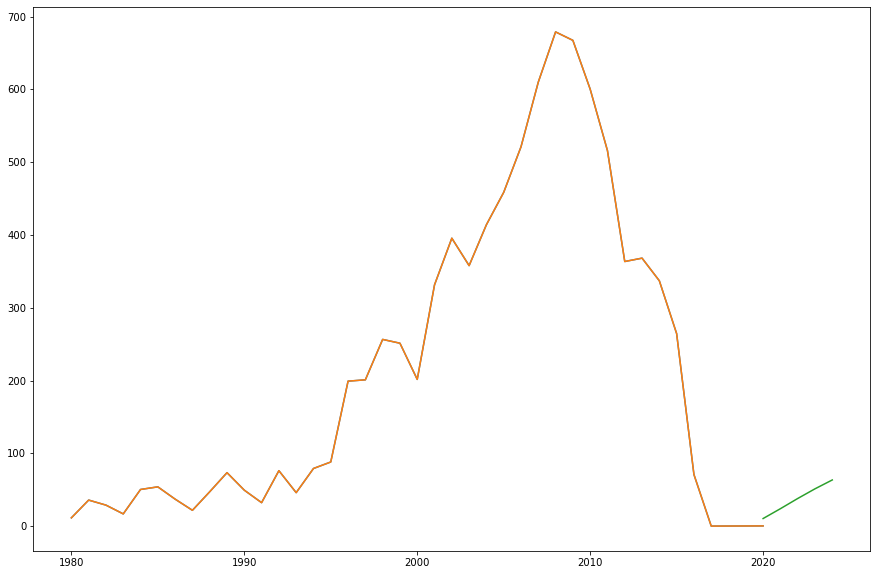

In [20]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period= 5
date_range = pd.date_range(str(y.index[-1]), periods = forecast_period, 
              freq='Y').strftime("%Y").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_years = pd.DataFrame(date_range, columns = ['year'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_years['year'] = pd.to_datetime(future_years['year']).dt.year
future_years.set_index('year', inplace = True)

future_years['Prediction'] = pd.Series(forecast[0]).values

# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(15,10))
plt.plot(y)
plt.plot(y.append(future_years))
plt.show()

In [21]:
returns = y.pct_change()

In [22]:
autocorrelation = returns['global_sales'].autocorr()

In [23]:
print("The autocorrelation of annual returns is %4.2f" %(autocorrelation))

The autocorrelation of annual returns is -0.30


In [24]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

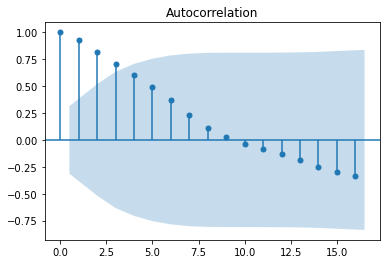

In [25]:
plot_acf(y)
pyplot.show()

In [37]:
from matplotlib import pyplot
from arch import arch_model
import datetime as dt

In [47]:
# split into train/test
split_date = dt.datetime(2008,1,1).year

In [55]:
# define model
model = arch_model(train, mean='Constant', vol='ARCH', p=4)

In [56]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 187.23348050424815
Iteration:      2,   Func. Count:     15,   Neg. LLF: 187.18035823994552
Iteration:      3,   Func. Count:     22,   Neg. LLF: 187.1657397361566
Iteration:      4,   Func. Count:     29,   Neg. LLF: 187.16387218275864
Iteration:      5,   Func. Count:     36,   Neg. LLF: 187.16158298520233
Iteration:      6,   Func. Count:     43,   Neg. LLF: 187.14849181288972
Iteration:      7,   Func. Count:     50,   Neg. LLF: 187.12073528813977
Iteration:      8,   Func. Count:     57,   Neg. LLF: 187.0414341405638
Iteration:      9,   Func. Count:     64,   Neg. LLF: 186.85858488360432
Iteration:     10,   Func. Count:     71,   Neg. LLF: 185.44428407190554
Iteration:     11,   Func. Count:     78,   Neg. LLF: 206.340611176886
Iteration:     12,   Func. Count:     86,   Neg. LLF: 284.89338096359836
Iteration:     13,   Func. Count:     96,   Neg. LLF: 179.1602556626133
Iteration:     14,   Func. Count:    103,   Neg. LLF: 17

In [57]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:           global_sales   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -171.643
Distribution:                  Normal   AIC:                           355.286
Method:            Maximum Likelihood   BIC:                           363.490
                                        No. Observations:                   29
Date:                Fri, Jul 30 2021   Df Residuals:                       28
Time:                        09:04:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            45.4172      6.179      7.350  1.982e-13 [ 33.306, 57.528]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        477.0653    208.198      2.291  2.194e-02    [ 69.005,8.851e+02]
alpha[1]       1.0000      0.256      3.901  9.582e-05      [  0.498,  1.502]
alpha[2]   3.7836e-13      0.162  2.331e-12      1.000      [ -0.318,  0.318]
alpha[3]   1.9860e-12      0.141  1.410e-11      1.000      [ -0.276,  0.276]
alpha[4]   1.8119e-12  1.030e-02  1.759e-10      1.000 [-2.019e-02,2.019e-02]
=============================================================================

Covariance estimator: robust
"""

In [60]:
# define model
model = arch_model(train, mean='Constant', vol='GARCH', p=4)

In [61]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 188.12313873648444
Iteration:      2,   Func. Count:     17,   Neg. LLF: 187.98864459191222
Iteration:      3,   Func. Count:     25,   Neg. LLF: 187.92833028006118
Iteration:      4,   Func. Count:     33,   Neg. LLF: 187.85471061835588
Iteration:      5,   Func. Count:     41,   Neg. LLF: 187.84533534051963
Iteration:      6,   Func. Count:     49,   Neg. LLF: 187.8415776982654
Iteration:      7,   Func. Count:     57,   Neg. LLF: 187.83547659760183
Iteration:      8,   Func. Count:     65,   Neg. LLF: 187.8109062221974
Iteration:      9,   Func. Count:     73,   Neg. LLF: 187.7536071540336
Iteration:     10,   Func. Count:     81,   Neg. LLF: 187.58297271832322
Iteration:     11,   Func. Count:     89,   Neg. LLF: 187.12596429375583
Iteration:     12,   Func. Count:     97,   Neg. LLF: 186.16885703025707
Iteration:     13,   Func. Count:    105,   Neg. LLF: 184.32592638182732
Iteration:     14,   Func. Count:    113,   Neg. LLF: 

In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:           global_sales   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -182.947
Distribution:                  Normal   AIC:                           379.894
Method:            Maximum Likelihood   BIC:                           389.465
                                        No. Observations:                   29
Date:                Fri, Jul 30 2021   Df Residuals:                       28
Time:                        09:11:50   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            69.9772     15.926      4.394  1.114e-05 [ 38.762,1.012e+02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.1193e+04   4359.510      2.568  1.024e-02 [2.649e+03,1.974e+04]
alpha[1]       0.9523      1.209      0.788      0.431     [ -1.417,  3.322]
alpha[2]   7.7184e-14      1.713  4.506e-14      1.000     [ -3.357,  3.357]
alpha[3]   8.7270e-14      1.614  5.407e-14      1.000     [ -3.163,  3.163]
alpha[4]   1.0349e-13      1.161  8.917e-14      1.000     [ -2.275,  2.275]
beta[1]    3.1899e-13      0.319  1.001e-12      1.000     [ -0.624,  0.624]
============================================================================

Covariance estimator: robust
"""